<a href="https://colab.research.google.com/github/aslla77/aslla77/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

기말고사

11501568/11490434 [==============================] - 0s 0us/step


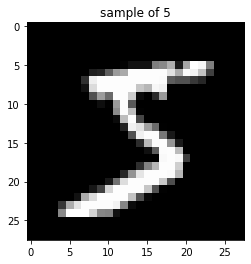

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns


#  MNIST dataset import
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train, x_test = x_train/255.0, x_test/255.0

# show handwritting image 
def show(a,b,n):
  image = a[n]
  image_reshaped = image.reshape(28, 28)
  image_reshaped.shape
  plt.figure(figsize = (4, 4))
  try:
    label =b[n]
    plt.title("sample of " + str(label))
  except:
    plt.title("sample of " + str(n))
  plt.imshow(image_reshaped, cmap="gray")
  plt.show()

show(x_train,y_train,0)

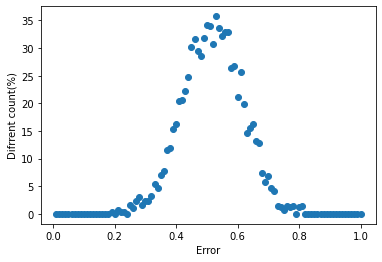

max diffrent %: 35.75 %


In [ ]:
xi1 = np.zeros([4, 64])
xi1[0] =  [ 1,1,1,1,1,1,1,1, \
          1,1,1,1,1,1,1,1, \
          0,0,0,0,0,0,1,1, \
          0,0,0,0,0,0,1,1, \
          0,0,0,0,0,0,1,1, \
          0,0,0,0,0,0,1,1, \
          0,0,0,0,0,0,1,1, \
          0,0,0,0,0,0,1,1 ]
xi1[1] = [  1,1,0,0,0,0,0,0, \
          1,1,0,0,0,0,0,0, \
          1,1,0,0,0,0,0,0, \
          1,1,0,0,0,0,0,0, \
          1,1,0,0,0,0,0,0, \
          1,1,0,0,0,0,0,0, \
          1,1,1,1,1,1,1,1, \
          1,1,1,1,1,1,1,1 ]
xi1[2] = [  1,1,1,1,1,1,1,1, \
          1,1,1,1,1,1,1,1, \
          1,1,0,0,0,0,1,1, \
          1,1,0,0,0,0,1,1, \
          1,1,0,0,0,0,1,1, \
          1,1,0,0,0,0,1,1, \
          1,1,1,1,1,1,1,1, \
          1,1,1,1,1,1,1,1 ]
xi1[3] = [  1,1,1,1,1,1,1,1, \
          1,1,1,1,1,1,1,1, \
          1,1,0,0,0,0,0,0, \
          1,1,0,0,0,0,0,0, \
          1,1,0,0,0,0,0,0, \
          1,1,0,0,0,0,0,0, \
          1,1,1,1,1,1,1,1, \
          1,1,1,1,1,1,1,1 ]
def show(a,L):
  plt.imshow(a.reshape(L,L))
  plt.show()

def asd(p,L,MaxStep,Error):
  global xi1, F, J, S,p1
  N = L*L
  p1=p
  if p==4:
    xi1=xi1[0:p]
  elif p==3:
    xi1=xi1[0:p]
  
  xi1[xi1 == 0] = -1 #change 0 to -1
  J = (xi1.T@xi1)/p
  beta = np.random.randint(p)

  S = xi1[beta].copy()
  # print('Original')
  # plt.imshow(S.reshape(L,L))
  # plt.show()
  A=S.reshape(L,L)

  for i in range(N):
    if np.random.rand() < Error: S[i] *= -1
  # print('Input')
  # plt.imshow(S.reshape(L,L))
  # plt.show()
  F = J@S


  for counter in range(MaxStep):
    for k in range(N):
      dE = 2*(F[k]*S[k] - J[k][k])
      if dE < 0:
        for i in range(N):
          F[i] -= 2*J[i][k]*S[k]
        S[k] *= -1
  # print('Output')
  # plt.imshow(S.reshape(L,L))
  # plt.show()
  return  xi1[beta].reshape(L,L),S.reshape(L,L),beta, Error

xarr=[]
yarr=[]
#def asd(p,L,MaxStep,Error): aggument mean
for i in range(100):
  dataset=[]
  for no in range(100):
    a,b,beta,Error=asd(3,8,4,0.01*(i+1))

    #a=input b:output c:diffrent between a,b
    c=a==b
    if len(c[c==False])/64==1:
      b=b*-1
      c=a==b
      dataset.append(len(c[c==False])/64*100)
    else:
      dataset.append(len(c[c==False])/64*100)
  yarr.append(sum(dataset)/len(dataset))
  xarr.append(Error)  

plt.plot(xarr,yarr,'o')
plt.xlabel('Error')
plt.ylabel('Difrrent count(%)')
plt.show()

print('max diffrent %:',max(yarr),'%')

0:ㄱ, 1:ㄴ, 2:ㅁ
overlap between patter 0 and 1
-0.25 

overlap between patter 0 and 2
0.375 

overlap between patter 1 and 2
0.375 



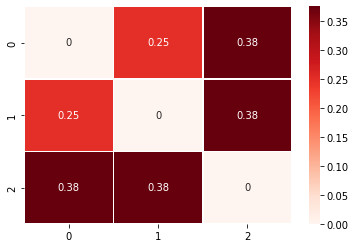

In [ ]:
overlapdata={}
MaxStep1=4
L1=8
N1 = L1*L1
Error=0.2

if p1==4:
  xi1=xi1[0:p1]
elif p1==3:
  xi1=xi1[0:p1]
xi1[xi1 == 0] = -1 #change 0 to -1
J = (xi1.T@xi1)/p1
beta = np.random.randint(p1)

S = xi1[beta].copy()

for i in range(N1):
  if np.random.rand() < Error: S[i] *= -1


for counter in range(MaxStep1):
  for k in range(N1):
    dE = 2*(F[k]*S[k] - J[k][k])
    if dE < 0:
      for i in range(N1):
        F[i] -= 2*J[i][k]*S[k]
      S[k] *= -1

F = J@S
#overlap data
for i in range(p1-1):
  datalist=[]
  for j in range(i+1, p1):
    F=J@S
    datalist.append(xi1[i].T@xi1[j]/(L1*L1))
  overlapdata[i]=datalist
if p1==4:
  print('0:ㄱ, 1:ㄴ, 2:ㅁ, 3:ㄷ')
else:
  print('0:ㄱ, 1:ㄴ, 2:ㅁ')
for i in range(p1-1):
  for j in range(len(overlapdata[i])):
    print("overlap between patter %d and %d" % (i, j+i+1))
    print(overlapdata[i][j],'\n')  

overlaps1 = np.zeros([p1,p1])
for i in range(p1):
  for j in range(p1):
    overlaps1[i][j] = np.abs(xi1[i].T@xi1[j]/64.)

overlaps1[overlaps1==1]=0
heatmap=sns.heatmap(overlaps1,cmap='Reds',annot=True,linewidth=0.5)

plt.show()


input


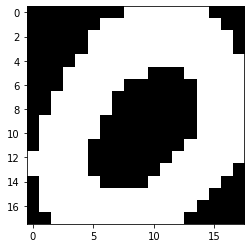

Output


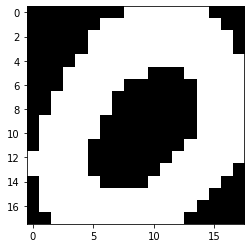


input


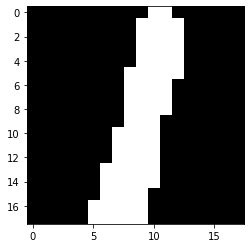

Output


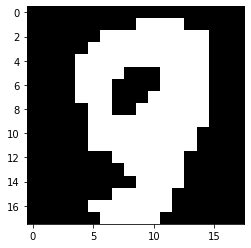


input


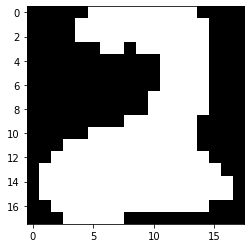

Output


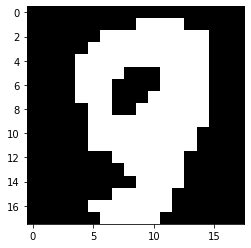


input


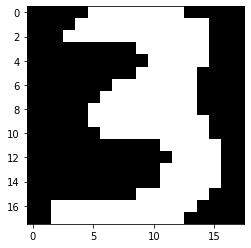

Output


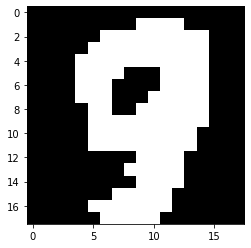


input


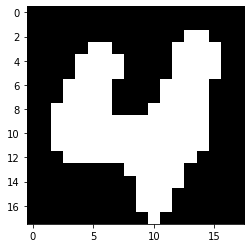

Output


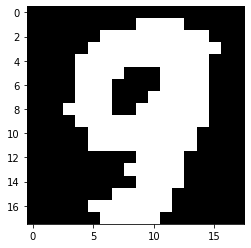


input


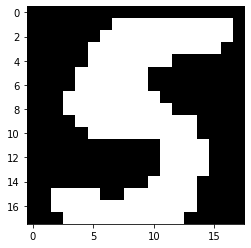

Output


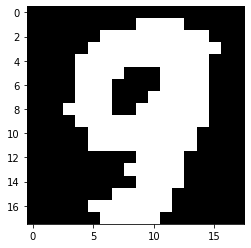


input


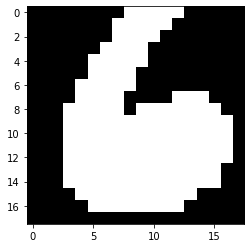

Output


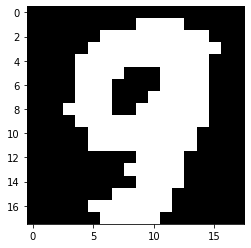


input


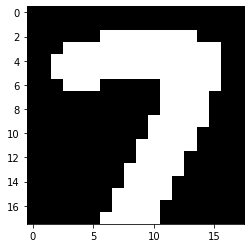

Output


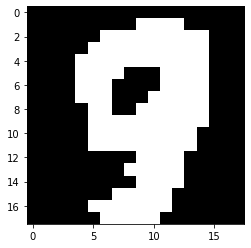


input


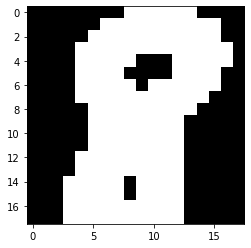

Output


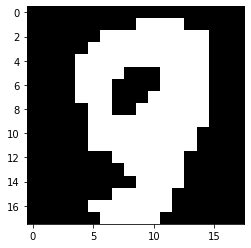


input


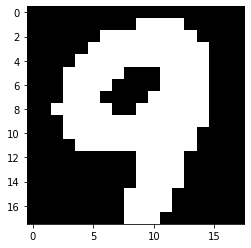

Output


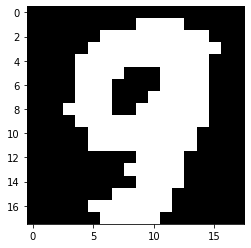

In [ ]:
# hopfiel model
p=10
start=5
L=18
N=L*L
MaxStep=1000
Error=0.325


# Creating average handwritting image and cutting

xi = np.zeros([p, L*L], dtype = 'float')

for i in range(0,p):
  a=list(np.where(y_train==i)[0])
  b=np.zeros((28,28))
  for j in (a):
    b+=x_train[j]
  c=b/len(a)
  c=c[start:start+L,start:start+L]
  xi[i]=c.reshape(N)

xi[xi <= Error] = -1.
xi[xi > Error] = 1.

J = (xi.T@xi)/p

# can see each number's average image ====

# for i in range(10):
#   print(i,'\'s average shape')
#   plt.imshow(xi[i].reshape(L,L),cmap="gray")
#   plt.show()

#=========================================
for xinum in range(10):


  S = xi[xinum].copy()

  #input image
  print('input')
  plt.imshow(S.reshape(L,L),cmap="gray")
  plt.show()

  F= J@S

  for counter in range(MaxStep):
    for k in range(N):
      dE = 2*(F[k]*S[k] - J[k][k])

      if dE < 0:
        for i in range(N):
          F[i] -= 2*J[i][k]*S[k]        
        S[k] *= -1

  #output image
  print('Output')
  plt.imshow(S.reshape(L,L), cmap="gray")
  plt.show()
  print('\n==============================')



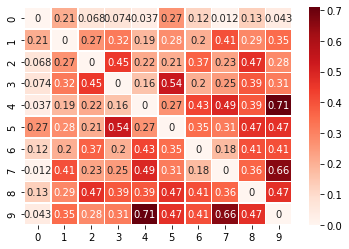


 0 's data


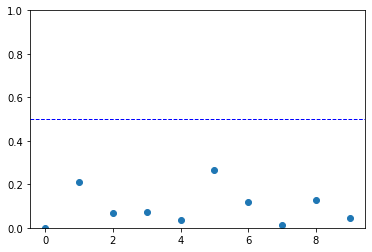

max overlap data: 0.2654320987654321
max overlap 0 with : [5]
avarge overlaps data: 0.10631001371742112

 1 's data


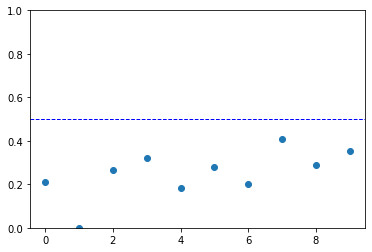

max overlap data: 0.4074074074074074
max overlap 1 with : [7]
avarge overlaps data: 0.27914951989026066

 2 's data


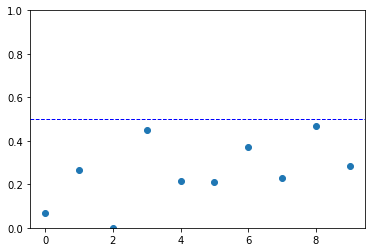

max overlap data: 0.4691358024691358
max overlap 2 with : [8]
avarge overlaps data: 0.284636488340192

 3 's data


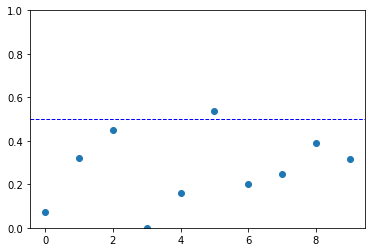

max overlap data: 0.5370370370370371
max overlap 3 with : [5]
avarge overlaps data: 0.29972565157750347

 4 's data


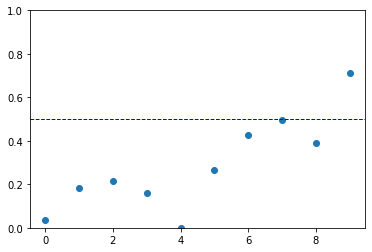

max overlap data: 0.7098765432098766
max overlap 4 with : [9]
avarge overlaps data: 0.32030178326474623

 5 's data


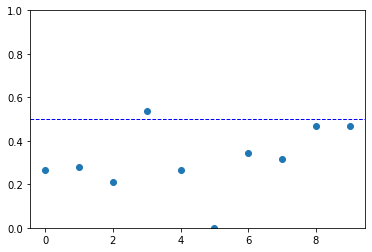

max overlap data: 0.5370370370370371
max overlap 5 with : [3]
avarge overlaps data: 0.350480109739369

 6 's data


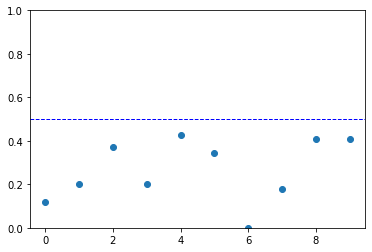

max overlap data: 0.42592592592592593
max overlap 6 with : [4]
avarge overlaps data: 0.2956104252400549

 7 's data


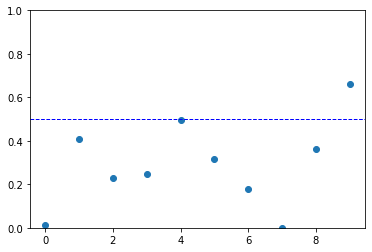

max overlap data: 0.6604938271604939
max overlap 7 with : [9]
avarge overlaps data: 0.32304526748971196

 8 's data


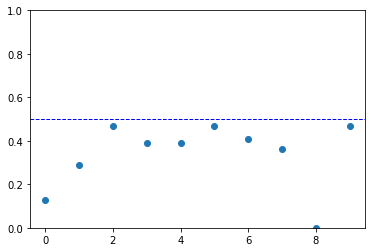

max overlap data: 0.4691358024691358
max overlap 8 with : [2 5 9]
avarge overlaps data: 0.3751714677640603

 9 's data


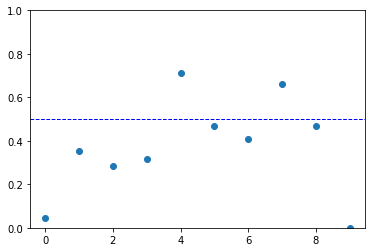

max overlap data: 0.7098765432098766
max overlap 9 with : [4]
avarge overlaps data: 0.41220850480109733
0.2716049382716049 
 [[4, 3, 0]]
1.8641975308641976 
 [[9, 7, 4]]


In [ ]:
zfrom types import prepare_class
#Creating overlap data

overlapdata={}
overlaps = np.zeros([p,p])
for i in range(p):
  for j in range(p):
    overlaps[i][j] = np.abs(xi[i].T@xi[j]/(L*L))
overlaps[overlaps==1]=0
# heatmap plot
heatmap=sns.heatmap(overlaps,cmap='Reds',annot=True,linewidth=0.5)
plt.show()

# Each number of overlap data
maxvalue=[]
for i in range(p):
  print('\n',i,'\'s data')
  plt.plot(overlaps[i],'o')
  plt.ylim(0,1)
  plt.axhline(y=0.5, color='b',linestyle = '--', linewidth=1)
  plt.show()
  maxnum=overlaps[i].copy()
  maxnum[maxnum==1]=0
  print('max overlap data:',max(maxnum))
  print('max overlap %d with :'% (i),np.where(maxnum==max(maxnum))[0])
  print('avarge overlaps data:',sum(maxnum)/(len(maxnum)-1))
  

# find max overlapdata and min overlaps data about 3 numbers's combination
maxdata=0
maxobj=[]
mindata=1
minobj=[]
midobj=[]

for i in range(10):
  for j in range(10):
    for z in range(10):
      if i!=j and i!=z and j!=z:
        data=overlaps[i][j]+overlaps[i][z]+overlaps[j][z]
        if data>=maxdata:
          maxdata=data
          maxobj.clear()
          maxobj.append([i,j,z])
        elif data<=mindata:
          mindata=data
          minobj.clear()
          minobj.append([i,j,z])
        
         
print(mindata,'\n',minobj)

print(maxdata,'\n',maxobj)



#4,6,9 = 1.543
#4,8,9 = 1.5679
#4,7,9 = 1.863

input


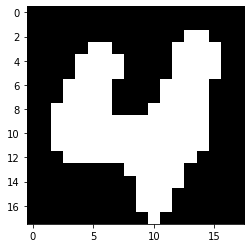

Output


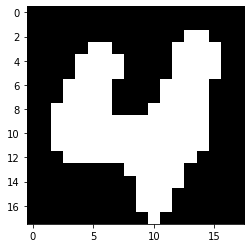

input


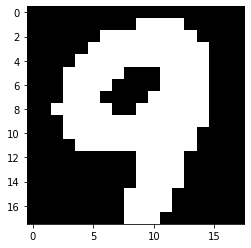

Output


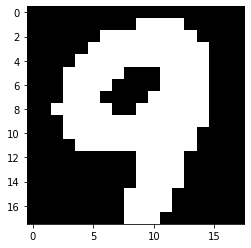

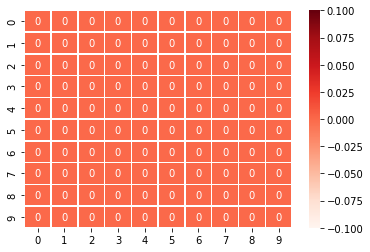

In [ ]:
# traind only 2 numbers
wrongset= np.zeros([10,10], dtype = 'float')
yi= np.zeros([2, L*L], dtype = 'float')
for i_1 in range(10):
  for j_1 in range(10):

    yi[0]=xi[i_1]
    yi[1]=xi[j_1]

    J = (yi.T@yi)/2
    for yinum in range(2):
      # print('input')

      S = yi[yinum].copy()

      F= J@S

      for counter in range(MaxStep):
        for k in range(N):
          dE = 2*(F[k]*S[k] - J[k][k])

          if dE < 0:
            for i in range(N):
              F[i] -= 2*J[i][k]*S[k]        
            S[k] *= -1

#4,9 have maximum overlap data
      if i_1==4 and j_1==9:
        print('input')
        plt.imshow(yi[yinum].reshape(L,L), cmap="gray")
        plt.show()      
        print('Output')
        plt.imshow(S.reshape(L,L), cmap="gray")
        plt.show()
      c=S==yi[yinum]        
      wrongset[i_1][j_1]=len(c[c==False])/N*100

heatmap=sns.heatmap(wrongset,cmap='Reds',annot=True,linewidth=0.5)
plt.show()

min overlap data! ==========
input


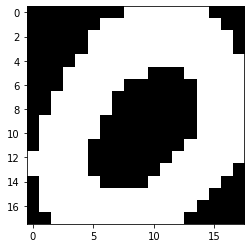

Output


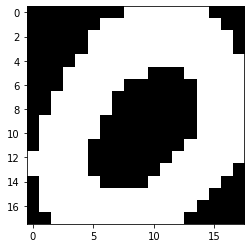

input


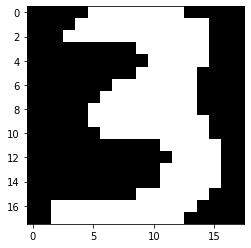

Output


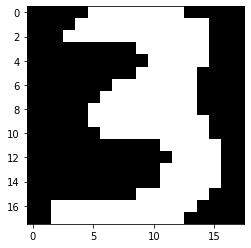

input


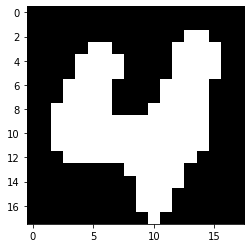

Output


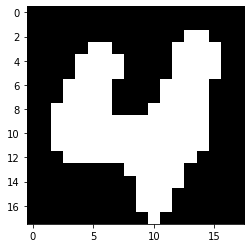

max overlap data! ==========
input


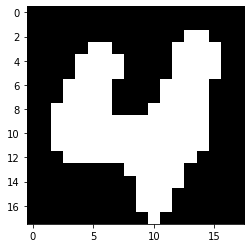

Output


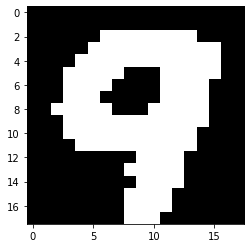

input


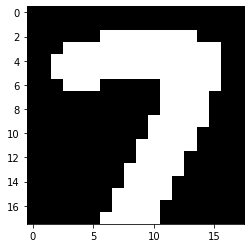

Output


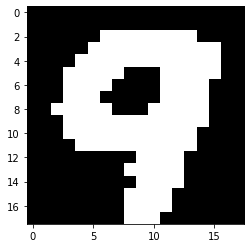

input


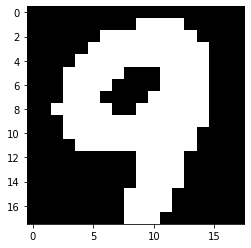

Output


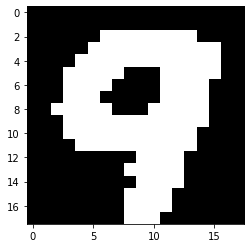

******************************
input


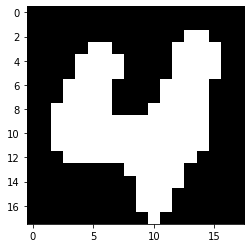

Output


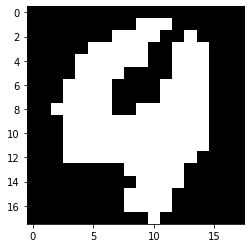

input


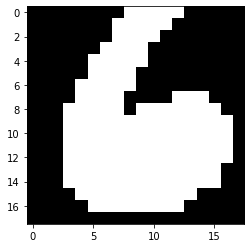

Output


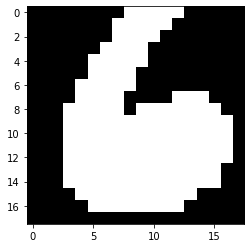

input


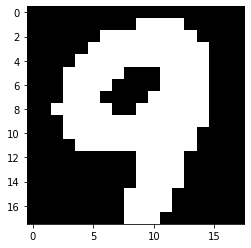

Output


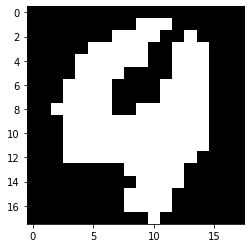

******************************
input


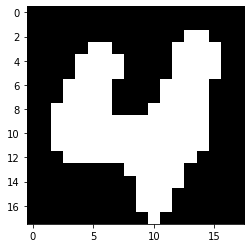

Output


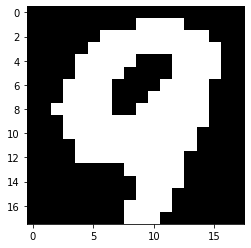

input


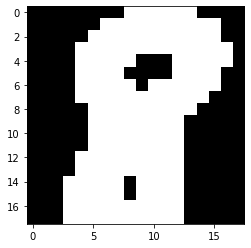

Output


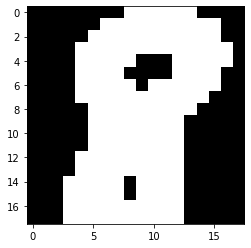

input


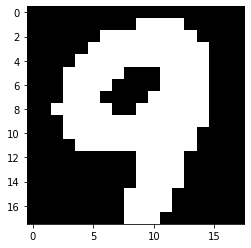

Output


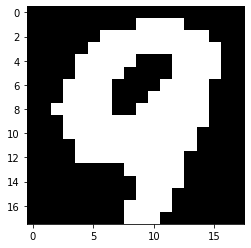

In [ ]:
#trained 3 numbers

MaxStep_1=500
p_1=3
wrongset= np.zeros([3,p_1,p_1], dtype = 'float')
yi= np.zeros([3, L*L], dtype = 'float')
def three(a,b,c):
  yi[0]=xi[a].copy()
  yi[1]=xi[b].copy()
  yi[2]=xi[c].copy()

  J = (yi.T@yi)/3
  for yinum in range(3):
    # print('input')

    S = yi[yinum].copy()

    F= J@S

    for counter in range(MaxStep_1):
      for k in range(N):
        dE = 2*(F[k]*S[k] - J[k][k])

        if dE < 0:
          for i in range(N):
            F[i] -= 2*J[i][k]*S[k]        
          S[k] *= -1
   
    print('input')
    plt.imshow(yi[yinum].reshape(L,L),cmap="gray")
    plt.show()

    print('Output')
    plt.imshow(S.reshape(L,L), cmap="gray")
    plt.show()
       

print('min overlap data!','='*10)
three(0,3,4)

print('max overlap data!','='*10)
three(4,7,9)

# 4,9,6 임팩트있음
# 4,8,9 하나 틀림
# 4,7,9 완전 틀림
print('*'*30)
three(4,6,9)

print('*'*30)
three(4,8,9)
